# 정규방정식

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

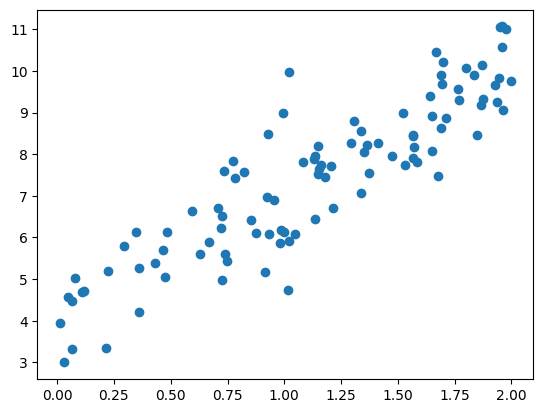

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0 = 1을 추가
# linalg: 선형대수 함수 (linear algebra)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[4.06197974],
       [2.97713013]])

In [16]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.06197974],
       [10.01624   ]])

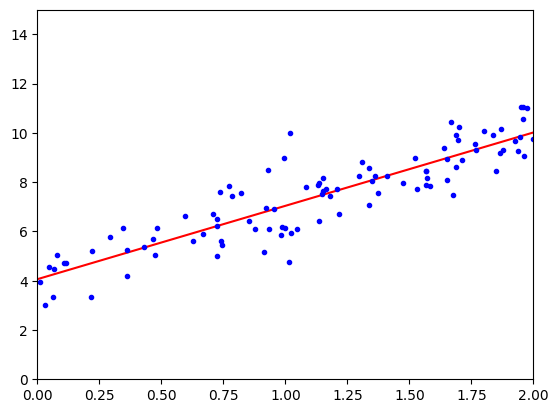

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [8]:
# intercept_ 절편, coef_ 가중치
lin_reg.intercept_, lin_reg.coef_

(array([4.06197974]), array([[2.97713013]]))

In [9]:
lin_reg.predict(X_new)

array([[ 4.06197974],
       [10.01624   ]])

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6) # 최소제곱법 Least Squares Problem
theta_best_svd

# residual: 잔차 또는 오차 벡터, 실제 값과 예측 값 간의 차이
# rank: 행렬의 선형 독립된 행 또는 열의 최대 개수를 나타냄
# s: 특이값 벡터입니다. 특이값은 행렬의 특이분해(singular value decomposition, SVD)에서 나오는 중요한 값으로, 선형 회귀 문제에서 잔차의 크기를 측정하는 데 사용됩니다.

array([[4.06197974],
       [2.97713013]])

In [11]:
# 유사역 행렬 (pseudoinverse) = 무어-펜로즈 (Moore-Penrose) 역행렬
np.linalg.pinv(X_b).dot(y)

array([[4.06197974],
       [2.97713013]])

# 경사 하강법

## 배치 경사하강법 (Batch Gradient Descent)

In [17]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # 무작위 초기화

for iter in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [18]:
theta

array([[4.06197974],
       [2.97713013]])

## 확률적 경사 하강법 (Stochastic Gradient Descent)

In [19]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m): # m번: 훈련 세트에 있는 샘플 수
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index + 1]
        yi = y[random_index: random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [20]:
theta

array([[4.02025396],
       [3.00883142]])

In [22]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

'''
max_iter: 최대 반복 횟수로, 경사 하강법을 몇 번 반복할지를 결정합니다.
tol: 반복 중 비용 함수의 변화가 이 값보다 작아지면 알고리즘이 수렴했다고 간주합니다.
penalty: 규제 항을 설정하는데, 여기서는 규제를 사용하지 않기 위해 None으로 설정되었습니다.
eta0: 학습률(learning rate)의 초기값으로, 경사 하강법 단계의 크기를 조절합니다
'''

SGDRegressor(eta0=0.1, penalty=None)

In [23]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.0518508]), array([3.02475821]))

## 미니배치 경사하강법 (mini-batch Gradient Descent)

In [26]:
n_epoch = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 무작위 초기화

t0, t1 = 200, 1000 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_epoch):
    shuffled_indices = np.random.permutation(m) # 0부터 m-1까지의 정수를 무작위로 섞은 배열을 생성
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients

In [27]:
theta

array([[4.03037176],
       [2.95983629]])